In [ ]:
# https://media.geeksforgeeks.org/wp-content/uploads/nba.csv

In [1]:
# importing pandas as pd
import pandas as pd

# Making data frame from the csv file
df = pd.read_csv('/content/nba.csv')

# Printing the first 10 rows of the data frame for visualization
df[:10]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12.0,PG,22.0,6-2,190.0,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36.0,PG,22.0,6-4,220.0,Oklahoma State,3431040.0


In [26]:

# To find the correlation among
# the columns using pearson method
corr = df.corr(method ='pearson',numeric_only = True)
corr

,Number,Age,Weight,Salary
Number,1.000000,0.028724,0.206921,-0.112386
Age,0.028724,1.000000,0.087183,0.213459
Weight,0.206921,0.087183,1.000000,0.138321
Salary,-0.112386,0.213459,0.138321,1.000000


In [25]:
# To find the correlation among
# the columns using kendall method
df.corr(method='kendall',numeric_only = True)

,Number,Age,Weight,Salary
Number,1.000000,0.005536,0.155850,-0.075301
Age,0.005536,1.000000,0.066130,0.172616
Weight,0.155850,0.066130,1.000000,0.087165
Salary,-0.075301,0.172616,0.087165,1.000000


In [8]:
c = df['Age'].corr(df['Salary'])
print('Correlations between age and salary\n',c)

Correlations between age and salary
 0.21345946515857156


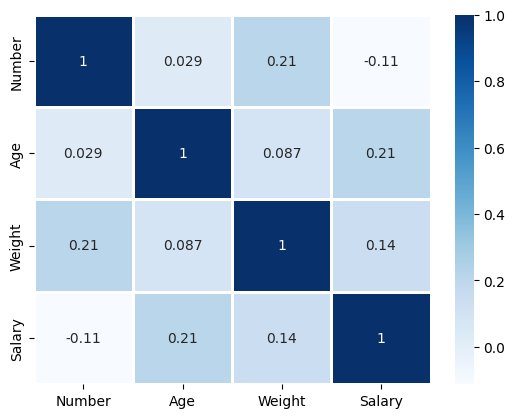

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.figure(figsize=(6,6), dpi =500)
cmap = "Blues"
sns.heatmap(corr,annot=True,linewidth=.9,cmap=cmap)
plt.show()

#Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Making data frame from the csv file
df_kc = pd.read_csv('/content/kc_house_data.csv')
df_kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [35]:
df_kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [36]:
df_kc.shape

(21613, 21)

we will perform regression analysis using only the following four features:

sqft_living — contains the size of the house in square feet.
yr_built — contains the year that the house was built.
condition — corresponds to the condition of the house.
Grade — the grade assigned to the house based on the King Count grading system.

In [45]:
df_kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [59]:
housing_data = df_kc[['sqft_living', 'yr_built', 'condition','grade', 'price']]
housing_data.head()

,sqft_living,yr_built,condition,grade,price
0,1180,1955,3,7,221900.0
1,2570,1951,3,7,538000.0
2,770,1933,3,6,180000.0
3,1960,1965,5,7,604000.0
4,1680,1987,3,8,510000.0


In [60]:
housing_data.describe()

,sqft_living,yr_built,condition,grade,price
count,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,2079.899736,1971.005136,3.409430,7.656873,5.400881e+05
std,918.440897,29.373411,0.650743,1.175459,3.671272e+05
min,290.000000,1900.000000,1.000000,1.000000,7.500000e+04
25%,1427.000000,1951.000000,3.000000,7.000000,3.219500e+05
50%,1910.000000,1975.000000,3.000000,7.000000,4.500000e+05
75%,2550.000000,1997.000000,4.000000,8.000000,6.450000e+05
max,13540.000000,2015.000000,5.000000,13.000000,7.700000e+06


In [61]:
X = housing_data[['sqft_living', 'yr_built', 'condition','grade']]
y = housing_data['price']

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # Apply StandardScaler to the numerical columns
# X_standardized = scaler.fit_transform(X)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state=42)

In [82]:
X_train.shape

(16209, 4)

In [85]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [84]:
y_train.isna().sum()

0

ValueError: ignored

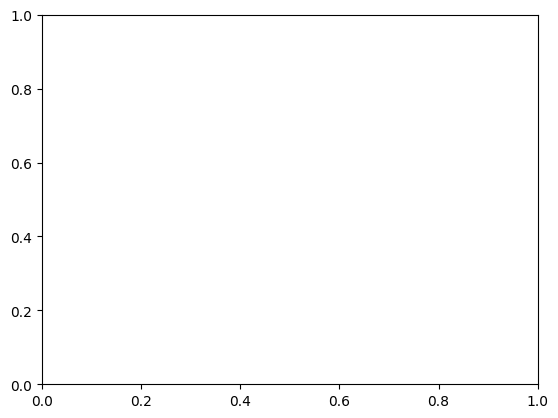

In [74]:
plt.scatter(X_train, y_train, color='red') # plotting the observation line
plt.plot(X_train, reg.predict(X_train), color='blue') # plotting the regression line
plt.show() # spe

In [64]:
attributes_coefficients = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
attributes_coefficients

,Coefficient
sqft_living,162345.841344
yr_built,-104019.457781
condition,7404.588561
grade,165476.244443


According to to this model:

Each square-footage increase in area causes an increase of 176 in the price.
Each increase of one year in the year built causes a decrease of 3541 in the price.
Each one-unit increase in a house's condition causes an increase of 11379 in its price.
Each one-unit increase in the grade of a house causes an increase of 140779 in its price.

In [86]:
y_pred = reg.predict(X_test)

comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison

,Actual,Predicted
735,365000.0,5.399044e+05
2830,865000.0,7.298718e+05
4106,1038000.0,1.212411e+06
16218,1490000.0,1.517625e+06
19964,711000.0,6.904080e+05
...,...,...
11144,650000.0,8.167998e+05
17803,705000.0,5.533584e+05
268,272500.0,5.533150e+05
518,2250000.0,1.415460e+06


ValueError: ignored

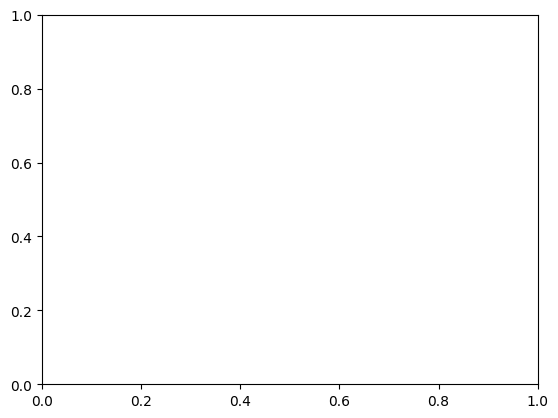

In [69]:
plt.scatter(X_train, y_train, color='red') # plotting the observation line
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
plt.title("Salary vs Experience (Training set)") # stating the title of the graph

plt.xlabel("Years of experience") # adding the name of x-axis
plt.ylabel("Salaries") # adding the name of y-axis
plt.show() # spe

In [68]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 150410.96969166683
MSE: 59028208836.96176
RMSE: 242957.21606274994


In [ ]:
# importing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

# data preprocessing
X = dataset.iloc[:, :-1].values  #independent variable array
y = dataset.iloc[:,1].values  #dependent variable vector

# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

# fitting the regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train) #actually produces the linear eqn for the data

# predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

y_test

# visualizing the results
#plot for the TRAIN

plt.scatter(X_train, y_train, color='red') # plotting the observation line
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
plt.title("Salary vs Experience (Training set)") # stating the title of the graph

plt.xlabel("Years of experience") # adding the name of x-axis
plt.ylabel("Salaries") # adding the name of y-axis
plt.show() # specifies end of graph

#plot for the TEST

plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
plt.title("Salary vs Experience (Testing set)")

plt.xlabel("Years of experience")
plt.ylabel("Salaries")
plt.show()